In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# datetime 표준 라이브러리.
from datetime import datetime 
from pandas_datareader import data

#### datetime Library
- datetime.설정값(year, month, day, hour, minute, second)
- datetime.now() : 현재 시각.
- 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavio 

In [2]:
dt = datetime(1999,12,23,5,12,13)
dt

datetime.datetime(1999, 12, 23, 5, 12, 13)

In [3]:
print(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)

1999 12 23 5 12 13


In [4]:
# 정적 메소드.
# 현재시각을 보여줌.
datetime.now()  

datetime.datetime(2021, 3, 6, 21, 38, 27, 679561)

#### 시계열(Time Series) 데이터의 정의
- 1. 인덱스가 datetime 형
- 2. 시계열 데이터의 인덱싱, 슬라이싱을 사용이 가능.

In [5]:
# 사용할 데이터 만들기.
time_data = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]

# 데이터 프레임으로 전환.
df = pd.DataFrame(time_data)

# 주의 사항.
# 인덱스 설정.
# dtype='object'(문자열) => 인덱스 설정을 ['2019-01-01'] 할 시 시계열 데이터의 형태가 아님.
df.index = ['2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01']
df.index

Index(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01'],
      dtype='object')

In [6]:
# pd.to_datetime : 문자열 타입을 datetime 타입으로 변환.
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [7]:
# 또는 처음 설정시 datetime()을 이용해서 dtype : datetime으로 설정.
df.index = [datetime(2019,1,1), datetime(2019,2,1), datetime(2019,3,1), datetime(2019,4,1),
           datetime(2019,5,1), datetime(2019,6,1), datetime(2019,7,1), datetime(2019,8,1)]
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

- 단, 2019년 11월 20일 => 이런 형태는 종종 데이터타임형 변환시 에러가 발생. => 이경우 format 지정이 필요.

In [8]:
df.index = ['2019년 1월 1일', '2019년 2월 1일', '2019년 3월 1일', '2019년 4월 1일', 
            '2019년 5월 1일', '2019년 6월 1일', '2019년 7월 1일', '2019년 8월 1일']
df

,0,1
2019년 1월 1일,1,2
2019년 2월 1일,3,4
2019년 3월 1일,5,8
2019년 4월 1일,7,6
2019년 5월 1일,9,12
2019년 6월 1일,11,10
2019년 7월 1일,13,16
2019년 8월 1일,15,20


In [9]:
# 에러 발생.
# pd.to_datetime(df.index)

# 따라서 format 설정.
df.index = pd.to_datetime(df.index, format='%Y년 %m월 %d일')
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

#### 주식 데이터

In [10]:
# data.get_data_yahoo(종목코드, 시작날짜, 끝날짜)
# 삼성전자 주식 데이터 가져오기.
samsungdf = data.get_data_yahoo('005930.KS', '2017-01-01' )
samsungdf.head(10)
# samsungdf.index

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31899.654297
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,32235.439453
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31952.667969
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31422.482422
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31988.015625
2017-01-09,37500.0,36560.0,36600.0,37220.0,13194900.0,32889.339844
2017-01-10,37400.0,37080.0,37280.0,37240.0,9099800.0,32907.007812
2017-01-11,38560.0,37420.0,37520.0,38280.0,12018150.0,33826.007812
2017-01-12,38800.0,37980.0,38000.0,38800.0,11669150.0,34285.488281


#### 이동평균(MA,  Moving Average)
- 가격, 지수 등의 수치의 변화를 관찰하고 분석하는데 있어서 일정한 부분집합의 평균값 계산으로 인해 값의 전반적인 변화 흐름(추세)를 파악하는데 용이.
- df.rolling()
    -  df.rolling().통계 함수 : mean. std, sum...etc.
    - window : 몇 개를 가지고 연산할지를 설정.
    - center : 중간 지점을 기준으로 연산.(True, False)
    - min_periods : 데이터가 지정한 개수만큼만 존재하면 연산.
- 참고 사이트 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [11]:
df.columns = ['A','B']
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


In [12]:
df.rolling(window=2).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,2.0,3.0
2019-03-01,4.0,6.0
2019-04-01,6.0,7.0
2019-05-01,8.0,9.0
2019-06-01,10.0,11.0
2019-07-01,12.0,13.0
2019-08-01,14.0,18.0


In [13]:
# 데이터가 1개 이상이라도 존재하면  계산.
df.rolling(window=2, min_periods=1).mean()

,A,B
2019-01-01,1.0,2.0
2019-02-01,2.0,3.0
2019-03-01,4.0,6.0
2019-04-01,6.0,7.0
2019-05-01,8.0,9.0
2019-06-01,10.0,11.0
2019-07-01,12.0,13.0
2019-08-01,14.0,18.0


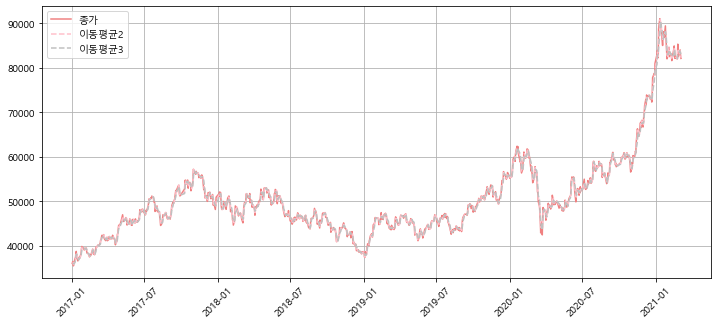

In [14]:
plt.figure(figsize = (12,5))
plt.plot( samsungdf['Close'], '-', color = 'lightcoral', alpha=2 )
plt.plot( samsungdf.rolling( window=2 ).mean()['Close'] , '--', color = 'pink' )
plt.plot( samsungdf.rolling( window=3 ).mean()['Close'] , '--', color = 'silver' )
plt.legend( ['종가', '이동평균2', '이동평균3'] )
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 시계열 데이터만 적용되는 Index slicing

In [15]:
# 2019년부터 1월부터 11월까지의 데이터.
samsungdf['2019-01' : '2019-11'].tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-18,53800.0,53200.0,53600.0,53500.0,7746554.0,50818.640625
2019-11-19,53500.0,52700.0,53200.0,53500.0,8907177.0,50818.640625
2019-11-20,53400.0,52000.0,53400.0,52000.0,12560070.0,49393.816406
2019-11-21,52100.0,50600.0,51600.0,51000.0,14298646.0,48443.937500
2019-11-22,51600.0,50900.0,51000.0,51600.0,8478310.0,49013.863281
2019-11-25,52600.0,51700.0,52200.0,51800.0,9050625.0,49203.843750
2019-11-26,52900.0,51800.0,51900.0,51800.0,27372226.0,49203.843750
2019-11-27,52300.0,51600.0,51800.0,52200.0,7546261.0,49583.792969
2019-11-28,52100.0,51300.0,51900.0,51300.0,6833885.0,48728.902344


In [16]:
# 데이터의 연도 데이터를 가져옴.
samsungdf.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Date', length=1016)

In [17]:
# 데이터의 달 데이터를 가져옴.
samsungdf.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
           dtype='int64', name='Date', length=1016)

In [18]:
# year 변수 추가.
samsungdf['year'] = samsungdf.index.year
samsungdf.head()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31899.654297,2017
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,32235.439453,2017
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31952.667969,2017
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31422.482422,2017
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31988.015625,2017


In [19]:
# 새로 만든 year 변수를 통한 계산.
samsungdf.groupby('year').mean()

,High,Low,Open,Close,Volume,Adj Close
year,,,,,,
2017,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,41121.356237
2018,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,42588.249338
2019,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,43768.266040
2020,57828.225806,56498.588710,57144.758065,57167.741935,2.174733e+07,55275.358146
2021,86154.761905,83716.666667,84726.190476,84754.761905,3.087291e+07,84754.761905


In [20]:
# 연도별로 각 주가 계산.
samsungdf.groupby( samsungdf.index.year ).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,41121.356237,2017
2018,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,42588.249338,2018
2019,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,43768.266040,2019
2020,57828.225806,56498.588710,57144.758065,57167.741935,2.174733e+07,55275.358146,2020
2021,86154.761905,83716.666667,84726.190476,84754.761905,3.087291e+07,84754.761905,2021


In [21]:
# 1 ~ 12월부터 각 월의 평균을 계산.
samsungdf.groupby( samsungdf.index.month ).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
1,55344.951456,53857.766990,54513.883495,54573.980583,1.890998e+07,51567.160801,2018.990291
2,55343.763441,54163.978495,54731.182796,54700.537634,1.659130e+07,51652.892431,2018.978495
3,48672.134831,47435.280899,48010.898876,48085.617978,1.827638e+07,44486.251097,2018.606742
4,47254.337349,46304.216867,46808.433735,46829.759036,1.365878e+07,43272.372647,2018.506024
5,47677.974684,46709.873418,47244.556962,47138.101266,1.551114e+07,43511.927561,2018.506329
6,48795.802469,47807.283951,48286.172840,48336.543210,1.476253e+07,44723.437886,2018.518519
7,49636.067416,48765.393258,49245.168539,49165.842697,1.188592e+07,45769.061096,2018.539326
8,48762.588235,47853.529412,48369.647059,48258.588235,1.257806e+07,44854.515349,2018.458824
9,51135.324675,50260.000000,50651.428571,50749.090909,1.344413e+07,47299.989702,2018.532468


In [22]:
# 년도 및 월에 따른 계산.
samsungdf.groupby( [samsungdf.index.year, samsungdf.index.month] ).mean()

High           Low          Open         Close  \
Date Date                                                           
2017 1     37826.000000  37079.000000  37340.000000  37486.000000   
     2     38912.000000  38276.000000  38578.000000  38571.000000   
     3     41447.272727  40740.909091  40890.000000  41166.363636   
     4     42261.000000  41549.000000  41910.000000  41959.000000   
     5     46040.000000  45188.421053  45590.526316  45550.526316   
     6     46869.523810  46216.190476  46460.952381  46574.285714   
     7     49745.714286  48939.047619  49334.285714  49393.333333   
     8     47323.636364  46495.454545  47096.363636  46858.181818   
     9     50516.000000  49716.000000  50023.000000  50214.000000   
     10    54593.750000  53442.500000  53997.500000  53961.250000   
     11    56005.000000  54952.000000  55669.000000  55366.000000   
     12    51328.888889  50258.888889  50790.000000  50733.333333   
2018 1     50688.571429  49367.619048  50108.571429  49933.333333   
     2     48043.333333  46793.333333  47413.333333  47248.888889   
     3     50141.904762  49035.238095  49611.428571  49683.809524   
     4     50606.666667  49520.000000  50019.047619  50163.809524   
     5     51835.000000  50647.500000  51407.500000  51102.500000   
     6     48905.263158  47907.894737  48526.315789  48371.052632   
     7     46704.545455  45890.909091  46320.454545  46220.454545   
     8     46229.545455  45431.818182  45763.636364  45947.727273   
     9     46476.470588  45620.588235  46076.470588  46064.705882   
     10    44169.047619  43133.333333  43614.285714  43600.000000   
     11    43807.142857  42857.142857  43366.666667  43390.476190   
     12    40260.526316  39515.789474  39813.157895  39826.315789   
2019 1     41902.272727  40970.454545  41415.909091  41600.000000   
     2     46779.411765  45861.764706  46370.588235  46308.823529   
     3     45010.000000  44072.500000  44542.500000  44560.000000   
     4     46490.909091  45611.363636  46088.636364  46061.363636   
     5     43573.809524  42602.380952  43123.809524  43023.809524   
     6     45057.894737  44357.894737  44663.157895  44865.789474   
     7     46619.565217  45865.217391  46276.086957  46215.217391   
     8     44254.761905  43483.333333  43871.428571  43840.476190   
     9     47526.315789  46750.000000  47089.473684  47294.736842   
     10    50376.190476  49516.666667  49933.333333  49880.952381   
     11    52655.000000  51730.000000  52270.000000  52195.000000   
     12    53982.500000  53002.500000  53495.000000  53507.500000   
2020 1     59475.000000  58195.000000  58870.000000  58815.000000   
     2     59675.000000  58330.000000  58890.000000  59085.000000   
     3     51440.909091  49325.000000  50381.818182  50331.818182   
     4     49567.500000  48445.000000  49127.500000  49045.000000   
     5     49476.315789  48626.315789  49071.052632  49100.000000   
     6     53768.181818  52218.181818  52950.000000  52986.363636   
     7     55356.521739  54256.521739  54930.434783  54726.086957   
     8     57865.000000  56600.000000  57360.000000  56980.000000   
     9     58761.904762  57709.523810  58176.190476  58176.190476   
     10    60242.105263  59263.157895  59836.842105  59736.842105   
     11    64019.047619  62476.190476  63090.476190  63419.047619   
     12    74233.333333  72600.000000  73066.666667  73619.047619   
2021 1     88410.000000  85190.000000  86365.000000  86565.000000   
     2     84177.777778  82400.000000  83272.222222  83127.777778   
     3     83775.000000  82275.000000  83075.000000  83025.000000   

                 Volume     Adj Close  year  
Date Date                                    
2017 1     1.102530e+07  33124.386328  2017  
     2     1.192612e+07  34083.143359  2017  
     3     1.193883e+07  36387.761009  2017  
     4     1.191310e+07  37201.599414  2017  
     5     1.358061e+07  40385.910567  2017  
     6     1.101470e+07  41305.460565  

#### Resample : groupby 유사하게 사용 가능하며 손쉽게 계산 가능.

In [23]:
# resample()를 통하면 짧은 코드를 손 쉽게 계산도 가능.
samsungdf.resample('M').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-31,37826.000000,37079.000000,37340.000000,37486.000000,1.102530e+07,33124.386328,2017
2017-02-28,38912.000000,38276.000000,38578.000000,38571.000000,1.192612e+07,34083.143359,2017
2017-03-31,41447.272727,40740.909091,40890.000000,41166.363636,1.193883e+07,36387.761009,2017
2017-04-30,42261.000000,41549.000000,41910.000000,41959.000000,1.191310e+07,37201.599414,2017
2017-05-31,46040.000000,45188.421053,45590.526316,45550.526316,1.358061e+07,40385.910567,2017
2017-06-30,46869.523810,46216.190476,46460.952381,46574.285714,1.101470e+07,41305.460565,2017
2017-07-31,49745.714286,48939.047619,49334.285714,49393.333333,1.058194e+07,43921.923177,2017
2017-08-31,47323.636364,46495.454545,47096.363636,46858.181818,1.218491e+07,41667.596058,2017
2017-09-30,50516.000000,49716.000000,50023.000000,50214.000000,1.014741e+07,44664.065820,2017


In [24]:
samsungdf.resample('W-MON').mean().head(10)

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,36240.000000,35880.0,35980.000000,36100.000000,4.650600e+06,31899.654297,2017.0
2017-01-09,36628.000000,36052.0,36324.000000,36324.000000,9.674540e+06,32097.589062,2017.0
2017-01-16,38180.000000,37252.0,37552.000000,37688.000000,1.307061e+07,33302.881641,2017.0
2017-01-23,37672.000000,36820.0,37132.000000,37328.000000,8.888080e+06,32984.769531,2017.0
2017-01-30,39326.666667,38540.0,38626.666667,39153.333333,1.323237e+07,34597.720052,2017.0
2017-02-06,39676.000000,39204.0,39604.000000,39392.000000,1.328379e+07,34808.619531,2017.0
2017-02-13,38804.000000,38240.0,38644.000000,38388.000000,1.339034e+07,33921.434375,2017.0
2017-02-20,38280.000000,37524.0,37724.000000,37968.000000,1.208106e+07,33550.302344,2017.0
2017-02-27,39116.000000,38436.0,38708.000000,38740.000000,9.529980e+06,34232.482031,2017.0


In [25]:
# 분기별 계산.
samsungdf.resample('Q').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-03-31,39461.290323,38764.516129,38999.032258,39141.935484,1.164004e+07,34591.634451,2017
2017-06-30,45070.666667,44335.000000,44668.333333,44711.666667,1.212670e+07,39646.316016,2017
2017-09-30,49144.444444,48332.380952,48771.428571,48768.571429,1.100376e+07,43370.298673,2017
2017-12-31,54028.148148,52940.370370,53547.407407,53405.555556,1.116375e+07,47633.611617,2017
2018-03-31,49703.666667,48479.000000,49126.000000,49040.666667,1.534626e+07,44131.168424,2018
2018-06-30,50477.333333,49385.333333,50009.166667,49909.000000,1.393414e+07,45240.869987,2018
2018-09-30,46469.672131,45650.000000,46051.639344,46078.688525,9.944799e+06,42080.294442,2018
2018-12-31,42827.049180,41911.475410,42345.081967,42352.459016,1.123298e+07,38969.443840,2018
2019-03-31,44361.016949,43431.355932,43903.389831,43960.169492,1.220284e+07,40825.341565,2019
